# 케라스를 활용한 CNN으로 MNIST 인식하기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import cv2

Using TensorFlow backend.


In [4]:
mnist = mnist.load_data()

In [5]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


28*28의 데이터

In [7]:
seed = 2019
np.random.seed(seed)
tf.set_random_seed(seed)

reshape(총 샘플 수, 차원 속성 수)

In [8]:
# 흑백이미지이므로 채널 1
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255
# 레이블 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

**convolutional 모델 생성**  
컨볼루션 신경망을 3개 거친 후, 맥스 풀링, 드롭아웃(20%끔)을 하겠습니다.  
그 후, 1차원으로 차원변경한 후 150개의 노드를 지닌 기본 층에 연결하고 마지막으로 드롭아웃(35%끔)한 후 마치겠습니다.

In [12]:
model = models.Sequential()
# model.add(layers.Conv2D(필터 수, kernel_size(행,열), input_shape=(행,열,색상채널_1 or 3)))
# 첫 번째 컨볼루션 신경망의 필터는 30개, 두 번째 필터는 40개, 세번 째 필터는 50개로 지정했습니다.
model.add(layers.Conv2D(30, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(40, (3,3), activation='relu', padding='SAME', strides=[1,1]))
model.add(layers.Conv2D(50, (3,3), activation='relu', padding='SAME'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 40)        10840     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 50)        18050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               1267650   
__________

**모델 컴파일**

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
import os

dir = 'C:/Users/seob/Desktop/ml,dl/mnist_CNN/'
if not os.path.exists(dir):
    os.mkdir(dir)

In [25]:
path = 'C:/Users/seob/Desktop/ml,dl/mnist_CNN/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=path, monitor='val_loss', verbose=1, save_best_only=True)
stop = EarlyStopping(monitor='val_loss', patience=30)

**모델 학습**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 698s 12ms/step - loss: 0.0149 - acc: 0.9955 - val_loss: 0.0289 - val_acc: 0.9909

Epoch 00001: val_loss did not improve from 0.02479
Epoch 2/10
60000/60000 [==============================] - 624s 10ms/step - loss: 0.0129 - acc: 0.9958 - val_loss: 0.0287 - val_acc: 0.9920

Epoch 00002: val_loss did not improve from 0.02479
Epoch 3/10
60000/60000 [==============================] - 652s 11ms/step - loss: 0.0132 - acc: 0.9958 - val_loss: 0.0253 - val_acc: 0.9923

Epoch 00003: val_loss did not improve from 0.02479
Epoch 4/10
60000/60000 [==============================] - 665s 11ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0283 - val_acc: 0.9912

Epoch 00004: val_loss did not improve from 0.02479
Epoch 5/10
60000/60000 [==============================] - 621s 10ms/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0342 - val_acc: 0.9912

Epoch 00005: val_loss did not improve from 0.0

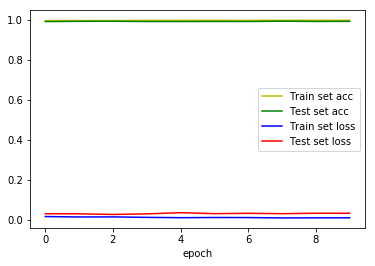

In [27]:
history = model.fit(X_train, y_train, batch_size=600, epochs=10, verbose=1, callbacks=[stop, checkpoint], validation_data=(X_test, y_test))

acc = history.history['acc']
v_acc = history.history['val_acc']
loss = history.history['loss']
v_loss = history.history['val_loss']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, c='y', label='Train set acc')
plt.plot(x_len, v_acc, c='g', label='Test set acc')
plt.plot(x_len, loss, c='b', label='Train set loss')
plt.plot(x_len, v_loss, c='r', label='Test set loss')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.show()